# **Final Project: Time Series Analysis and Forecasting**

### By Anastasios Fotiadis 

---

## **Intro: Dataset Explanation**

Our dataset selection is a csv file called: "coin_Cardano.csv". The dataset contains historical data for the cryptocurrency called "Cardano" (ADA), spannining 1374 daily observations. So, in total, the dataset has 1374 rows, with 10 columns (features) and the time span is from October 2, 2017 to July 6, 2021.
Each record contains essential information about the asset's trading activity and includes the following features:

* SNo: Serial number of the record.
* Name: The name of the cryptocurrency, Cardano (ADA).
* Symbol: The ticker symbol: "ADA."
* Date: The timestamp of the recorded data
* High, Low, Open, Close: Daily highest, lowest, opening and closing prices, respectively.
* Volume: The total trading volume in ADA units (market activity for each day).
* Marketcap: The total market capitalization of Cardano for the day.

We have a complete dataset, without any missing values and is spanning in a significant time frame, making it suitable for our project.

---


## **1st step: Data Collection and Preparation**

We begin our project by adding all the necessary libraries for our R script. More precisely we include:
* **tidyverse** for data manipulation and visualization
* **tsibble** for time series data structure
* **feasts** for time series decomposition and visualization
* **fable** for forecasting models
* **lubridate** for working with dates

Following that, we import our dataset "coin_Cardano.csv" in order to handle the data for our tasks.

In [ ]:
install.packages(c("tsibble", "feasts", "fable"))

In [ ]:
library(tidyverse)
library(tsibble)
library(feasts)
library(fable)
library(lubridate)

Then, we clean and prepare the data, by converting the "Date" column to date type and arrange the data by date, to ensure the dataset is in ascending order of time

In [ ]:
data <- read.csv("coin_Cardano.csv")

str(data)
head(data)

In [ ]:
data <- data %>%
  mutate(Date = ymd_hms(Date)) %>%
  arrange(Date)

We continue by creating a tsibble object which is required for analysis with our packages (tsibble and fable).


---
**PS**

We had an issue with our dataset, while creating the tsibble component, so we normalized the **Date** column to remove the time component and retain only the date. This was done because tsibble requires a regular temporal index, and having specific times, even if consistent, can cause validation errors. So, we exclude the **time** component from the dataset, because the entries are daily and time does not add any meaningfull info.

---

In [ ]:
data <- data %>%
  mutate(Date = as.Date(Date))

In [ ]:
data_tsibble <- data %>%
  as_tsibble(index = Date)

We proceed with the visualization and the summary of the dataset.

In [ ]:
summary(data_tsibble)

### **Summary**
We can see that the dataset captures daily historical data for Cardano (ADA) from October 2, 2017, to July 6, 2021, encompassing 1,374 observations. Key metrics include Close prices, which range from $0.01854 to $2.30911, with a mean of $0.25631. The dataset also shows significant trading volume variability, from $1.74M to $19.14B. The Marketcap similarly fluctuates, with values between $480.7M and $73.77B, reflecting the volatile nature of cryptocurrency markets.


In [ ]:
autoplot(data_tsibble, Close) +
  labs(title = "Cardano (ADA) Close Price Over Time")

### **Plot**
The plot of Close prices over time highlights two major trends: a sharp increase in 2018, followed by a prolonged plateau, and another dramatic rise in late 2020 and early 2021, indicative of high market volatility and speculative behavior.

### **Missing Values**



In [ ]:
colSums(is.na(data_tsibble))

To ensure the integrity of the dataset, a check for missing values was conducted using the is.na() function. The results confirmed that all columns, contained no missing values. Therefore, no imputation or further handling of missing data was required.

---

## **2nd step: Time Series Visualization**

* Each autoplot visualizes one variable (High, Low, Open, Close) against Date.
* These plots provide insights into price trends; long-term changes in High, Low, Open, and Close, as well as, market dynamics; variability in Volume and Marketcap.

In [ ]:
autoplot(data_tsibble, High) +
  labs(
    title = "Cardano (ADA) High Price Over Time",
    x = "Date",
    y = "High Price (USD)"
  )

In [ ]:
autoplot(data_tsibble, Low) +
  labs(
    title = "Cardano (ADA) Low Price Over Time",
    x = "Date",
    y = "Low Price (USD)"
  )

In [ ]:
autoplot(data_tsibble, Open) +
  labs(
    title = "Cardano (ADA) Open Price Over Time",
    x = "Date",
    y = "Open Price (USD)"
  )

In [ ]:
autoplot(data_tsibble, Close) +
  labs(
    title = "Cardano (ADA) Close Price Over Time",
    x = "Date",
    y = "Close Price (USD)"
  )

In [ ]:
autoplot(data_tsibble, Volume) +
  labs(
    title = "Cardano (ADA) Trading Volume Over Time",
    x = "Date",
    y = "Volume (ADA)"
  )

In [ ]:
autoplot(data_tsibble, Marketcap) +
  labs(
    title = "Cardano (ADA) Market Capitalization Over Time",
    x = "Date",
    y = "Marketcap (USD)"
  )

### **Trends and Patterns**
The High, Low, Open, and Close prices exhibit similar patterns, showing an initial sharp increase in late 2017, followed by a gradual decline and a long stabilization until late 2020. Another significant upward trend is observed in late 2020 to early 2021, reflecting a broader market rally. This trend is mirrored in the Marketcap, highlighting the growth in Cardano’s overall valuation during these periods.



### **Seasonality**
No clear seasonality is visually evident in the price variables (High, Low, Open, Close). However, trading Volume shows sudden spikes in activity during key price rallies, suggesting potential event-driven behavior rather than regular seasonal patterns.

### **Irregular Components**
Significant irregularities are visible, particularly in the trading Volume and price movements during early 2018 and early 2021. These spikes correspond to periods of heightened market speculation and activity, with noticeable volatility in all metrics during these times.

---

## **3rd step: Stationarity check**


For this step we will use the Augmented Dickey-Fuller (ADF) Test from the tseries package to test for stationarity in the time series data, on the close price column.

---

**PS**

Our focus will be on the Close price column for the time series analysis, because in financial and cryptocurrency analysis, the Close price is often the most important metric because it represents the final price at which the asset traded during the day, reflecting market sentiment. Also, the Close price is widely used in technical analysis, forecasting, and decision-making because it summarizes the day's activity and is less noisy than other metrics like High or Low. Finally, applying transformations, stationarity tests, and models to every column can be redundant unless specific insights are needed from other columns. Focusing on Close simplifies the analysis and interpretation.

---

In [ ]:
install.packages(c("tseries"))

In [ ]:
library(tseries)

adf_test <- adf.test(data_tsibble$Close, alternative = "stationary")
print(adf_test)

We can see from the adf_test results that the p-value is greater than 0.05. So, the series is non-stationary and needs transformation (differencing in our case)

In [ ]:
data_tsibble <- data_tsibble %>%
  mutate(diff_close = difference(Close))

autoplot(data_tsibble, diff_close) +
  labs(
    title = "Differenced Close Price Over Time",
    x = "Date",
    y = "Differenced Close Price"
  )

We conduct the adf_test once again so we can see if the series transformed.

In [ ]:
adf_test_diff <- adf.test(na.omit(data_tsibble$diff_close), alternative = "stationary")
print(adf_test_diff)


After the differencing we can see that the p-value now is less than 0.05. So, the series now is stationary, as indicated from the plot above that the data are much more stable.

---

## **4th step: ACF and PACF Analysis**

For this section, we will need to implement an ACF plot, which helps identify the **MA (q)** component of an ARIMA model by showing where the autocorrelation drops off significantly. Also, we need to do the same for the PACF plot and in this case this will help us identify the **AR (p)** component, by showing where the autocorrelation becomes insignificant.

We will use the feasts library for our work (already installed).

In [ ]:
data_tsibble %>%
  ACF(diff_close) %>%
  autoplot() +
  labs(title = "Autocorrelation Function (ACF) for Differenced Close Price")

In [ ]:
data_tsibble %>%
  PACF(diff_close) %>%
  autoplot() +
  labs(title = "Partial Autocorrelation Function (PACF) for Differenced Close Price")

### **Plot Insights**
The ACF and PACF plots for the stationary differenced Close series reveal the lag structure necessary for ARIMA model selection.

* ACF plot:
  
  The ACF plot shows the autocorrelation at different lags and
  we can observe that there are significant spikes at lag 1 and several subsequent lags. This suggests that there is presence of short term dependencies, indicating that the **Moving Average** component in the ARIMA model should include lags up to the first significant spike after the correlation begins dropping below the significance threshold.

* PACF plot:

  The PACF plot shows to us the the partial correlation at different lags, while controlling for the influence of intermediate lags. The observations to be discussed in this case are that there are significant spikes at lag 1 and possibly a few others and it suggests that the **Auto-Regressive** component (ARIMA model) should also consider lag 1.


Based on these observations, initial ARIMA parameters can include **AR(1)** and **MA(1)** components, though further refinement may be needed during model fitting.

---


## **5th step: Model Fitting**


### **1. ARIMA implementation**

An ARIMA model is fitted to the **Close** price series to capture the underlying temporal dependencies and trends. The **ARIMA()** function automatically selects the best combination of **p**, **d** and **q** parameters using AIC/BIC. The model is then used to forecast the next 30 days of **Close** prices and the forecast is visualized along with the historical data to observe predicted trends and confidence intervals.

In [ ]:
install.packages("urca")

In [ ]:
library(urca)

In [ ]:
arima_model <- data_tsibble %>%
  model(
    ARIMA_model = ARIMA(Close)
  )

report(arima_model)

In [ ]:
forecast_arima <- arima_model %>%
  forecast(h = "30 days")

autoplot(forecast_arima, data_tsibble) +
  labs(
    title = "ARIMA Model Forecast for Close Prices",
    x = "Date",
    y = "Close Price (USD)"
  )

The residual variance $(sigma^2 = 0.00155)$ indicates a good fit with minimal error. Model selection criteria, including AIC (-4979.67) and BIC (-4953.55), confirm the model's balance between accuracy and complexity. The generated forecast extends the Close price predictions with 80% and 95% confidence intervals, highlighting increasing uncertainty over time while maintaining alignment with recent trends.

---

### **2. SARIMA implementation**

The SARIMA model extends ARIMA by incorporating seasonal components to account for cyclic patterns in the data. Here, a seasonal ARIMA model with parameters **(p, d, q)** for non-seasonal components and **(P, D, Q, s)** for seasonal components is fitted to the **Close** price series. A seasonal period of 12 is specified to account for yearly cyclic behavior. The fitted model is used to generate a 30-day forecast, which is visualized alongside the historical data.


In [ ]:
sarima_model <- data_tsibble %>%
  model(
    SARIMA_model = ARIMA(Close ~ pdq(1, 1, 1) + PDQ(1, 1, 1, period = 12))
  )

report(sarima_model)

In [ ]:
forecast_sarima <- sarima_model %>%
  forecast(h = "30 days")

autoplot(forecast_sarima, data_tsibble) +
  labs(
    title = "SARIMA Model Forecast for Close Prices",
    x = "Date",
    y = "Close Price (USD)"
  )

In this case, the residual variance $(sigma^2)$ indicates that the model has a low error and the forecast for the next period was visualized with 80% and 95% confidence intervals. The forecast reflects the current trend, with increasing uncertainty as the prediction horizon extends.

### **3. Model Comparison**

In this section, we will try to identify the best-fitting model for our dataset. So a comparison is made between ARIMA and SARIMA models based on their AIC and BIC values. Lower AIC/BIC values indicate better model performance, with a balance between goodness-of-fit and model complexity.


---

**PS**

We manually extract key metrics (AIC, BIC, sigma^2,...) and combine them into a table for comparison, because glance() or report() outputs are not returning directly comparable data, and bind_rows() or rbind() fail to align their structures.

---

In [ ]:
arima_metrics <- data.frame(
  Model = "ARIMA(2,1,2)",
  AIC = -4979.67,
  BIC = -4953.55,
  Sigma2 = 0.00155
)

sarima_metrics <- data.frame(
  Model = "SARIMA(1,1,1)(1,1,1)[12]",
  AIC = -4893.22,
  BIC = -4867.14,
  Sigma2 = 0.001552
)

model_comparison <- rbind(arima_metrics, sarima_metrics)

print(model_comparison)

* **Insights**

The table compares the ARIMA(2,1,2) and SARIMA(1,1,1)(1,1,1)[12] models based on key performance metrics. The ARIMA(2,1,2) model has a lower AIC (-4979.67) and BIC (-4953.55) compared to the SARIMA model (-4893.22 for AIC and -4867.14 for BIC), indicating that it provides a better fit to the data with fewer parameters. Both models have similar residual variances (sigma^2), suggesting that they explain the data with similar accuracy.

However, the **ARIMA model** is preferred based on its lower complexity and better overall fit.

---


## **6th step: Residual Diagnostics**

### **Residuals**

Based on the findings from the previous step (5th step), the residuals diagnostics will be performed to assess the adequacy of the **ARIMA(2,1,2)** fitted model. In order to be a well-fitted model, it should produce residuals that resemble white noise, which means that they are uncorrelated and their distribution is normal. So, first we begin by plotting (visualization) the residuals to check if there are any patterns or deviations.

In [ ]:
arima_model %>%
  gg_tsresiduals() +
  labs(title = "Residual Diagnostics for ARIMA(2,1,2) fitted model")

From the plots above, we have 3 key insights into the model's residuals.

* The top plot shows the residuals over time, where there are no obvious patterns or trends visible. This indicates that the residuals behave in a random way.

* The bottom left plot displays the Auto-correlation function (ACF) of the residuals. We can see that most lags fall within the significance bounds. This suggests minimal auto-correlation. This of course will be elaborated further in the following query (Perform Ljung-Box test for autocorrelation).

* The bottom left plot, finally, shows a histogram of the residuals, which are centered around zero, implying a normal distribution of the residuals.


Together, all these plots validate that the model sufficiently captures the data's structure and leaves no systematic patterns unexplained.

### **ACF/PACF plots**

In addition to visualizing the ACF plot in the query above, we find essential to confirm whether the residuals are truly resembling white noise. We will do this by checking both functions (ACF, PACF).

While, the ACF plot above shows no significant autocorrelation in most of the lags, by plotting the PACF we will have further information and insights by isolating the direct effects of specific lags.

In [ ]:
arima_model %>%
  residuals() %>%
  PACF() %>%
  autoplot() +
  labs(title = "PACF of Residuals for ARIMA(2,1,2) Model")

Now that we have the plot, we can see that while some lags seem to appear slightly outside of the significance bounds, their magnitudes are small and unlikely to affect the assumption that we made of white noise. This supports our previous statement (based on the ACF) that the residuals are uncorrelated sufficiently enough. So, it reinforces the validity of the **ARIMA** model for forecasting.

### **Ljung-Box test**

The last thing that is left to do in order to ensure that our assumptions/statements are completely valid, is to perform the Ljung-Box test and evaluate its results.

In [ ]:
ljung_box_test <- arima_model %>%
  augment() %>%
  features(.resid, ljung_box, lag = 10, dof = 2)

print(ljung_box_test)

From the results we can see for our model (ARIMA), that the test-statistic is 31.8 and the p-value is 0.000103.

Because the p-value is less than 0.05, meaning that we reject the null hypothesis that the residuals are uncorrelated. This result suggests the presence of significant autocorrelation in the residuals, indicating that the ARIMA model may not fully capture all patterns in the data.

### **Conclusion**

* From the previous step, the AIC and BIC favored the ARIMA(2,1,2) model over the SARIMA model due to its lower values which indicate better fit and simplicity. The residual variance was almost identical for both models, not a metric to be evaluated. Based on these results, selecting the ARIMA model was valid.

* The ACF/PACF of the residuals visually showed minimal autocorrelation. Most values were within confidence bounds that suggests the residuals resemble white noise.

* The residuals plot also showed no patterns or trends, reinforcing the findings of ACF/PACF.

* The Ljung-Box test on the other hand, found significant autocorrelation $(p << 0.05)$, that contradicts our previous findings.

This discrepancy does not mean that we made a mistake in selecting ARIMA, it highlights subtle differences in the approaches. The ACF/PACF are visual tools that show autocorrelation at **individual lags**. Hence, they might miss cumulative autocorrelation across multiple lags, which Ljang-Box test detects. The Ljung-Box test aggregates autocorrelation over multiple lags and even small,insignificant autocorrelations at individual lags can combine to produce a statistically significant result.

So, we did not make a mistake choosing the ARIMA model, it was based on valid criteria. Instead, the Ljung-Box test result does not invalidate our earlier decision and it highlights that the ARIMA model is likely adequate for many purposes. But, because the white noise is not required we will continue without further adjustments.

**While the model is close, it does not fully capture all patterns in the data, leaving some systematic structure in the residuals.**

---

## **7th step: Forecasting**

Using the ARIMA fitted model, we will generate a forecast for the next 12 periods. The forecast includes both point estimates and confidence intervals to account for uncertainty in the predictions. We will also plot it to observe the results.

In [ ]:
arima_forecast <- arima_model %>%
  forecast(h = 12)

In [ ]:
autoplot(arima_forecast) +
  labs(
    title = "ARIMA Model Forecast for Close Prices",
    x = "Date",
    y = "Close Price (USD)"
  )

The forecast plot shows predicted **Close** prices for h = 12 periods, along with 80% and 95% confidence intervals. As expected, the confidence intervals widen as we forecast further into the future, reflecting increasing uncertainty. The model captures the underlying trend of the data and provides a reliable short-term forecast, with tighter intervals in the near term and broader intervals further out. This behavior aligns with typical time series forecasting models, where prediction accuracy diminishes over longer horizons.

---

## **8th step: Model Evaluation**

In order to evaluate the accuracy of the ARIMA(2,1,2) model, our dataset is split into training and testing sets. The model is trained on historical data (before July 2021) and tested on the remaining observations. Forecasted values for the test period are compared against the actual values using metrics such as MAE, MSE, and MAPE.

In [ ]:
train_data <- data %>%
  filter(Date < as.Date("2021-07-01"))
test_data <- data %>%
  filter(Date >= as.Date("2021-07-01"))

In [ ]:
train_tsibble <- train_data %>%
  as_tsibble(index = Date)

arima_model_train <- train_tsibble %>%
  model(ARIMA(Close))

In [ ]:
test_forecast <- arima_model_train %>%
  forecast(h = nrow(test_data))

In [ ]:
forecast_vs_actual <- forecast_vs_actual %>%
  rename(
    actual = Close.y,
    predicted = .mean
  )

metrics <- forecast_vs_actual %>%
  summarise(
    MAE = mean(abs(predicted - actual), na.rm = TRUE),
    MSE = mean((predicted - actual)^2, na.rm = TRUE),
    MAPE = mean(abs((predicted - actual) / actual), na.rm = TRUE) * 100
  )

print(metrics)

### **Evaluation Part**

* **Mean Absolute Error = 0.0311**

  This indicates that on average the model's predictions deviate from the actual values by approx 0.0311 USD, which is a reasonably low error for a time series of this kind.

* **Mean Squared Error = 0.00151**

  This metric reflects the average squared difference between predicted and actual values. The low value of MSE confirms that the model does not produce large prediction errors.

* **Mean Absolute Percentage Error = 2.22%**
  
  The predictions of the model have an average error of 2.22% relative to the actual close prices, which  suggests that the model is fairly accurate for forecasting.

Our model performs well, as evidenced by the low MAE, MSE, and MAPE values. A MAPE of 2.22% indicates that the model provides highly reliable forecasts for close prices, with errors remaining within a small percentage range. These results validate the choice of the ARIMAmodel as a robust forecasting method for our dataset.

---

## **9th step: Insights and Recommendations**

### **Insights**

The time series analysis and forecasting for Cardano's (ADA) cryptocurrency prices provided valuable insights into the dataset and the forecasting model's performance.

* The data exhibited significant **trends**, particularly a stready growth in 2020 and 2021, alongside some periods of volatility. Also, there were no missing values or significant outliers, which ensures our dataset's integrity.

* The **ARIMA(2,1,2)** model was selected over SARIMA based on AIC and BIC values. This model demonstrated lower complexity and provided a better fit for our data.

* While the residual and ACF,PACF plots showed small autocorrelation, the Ljung-Box test identified slight remaining autocorrelation, suggesting the model does not capture perfectly all the existing patterns.

* The model performed well with low **MAE(0.0311), MSE(0.00151), MAPE (2.22%)**, indicating that it is suitable for accurate short-term forecasts.

### **Practical Implications**

The forecasts could be valuable for several areas, like **investment decisions** because short-term forecasts of close prices can assist investors in planning entry or exit points for Cardano trading, while confidence intervals help quantify the level of uncertainty so it can enable more informed decisions. Also, for the **market analysis**, the interested can use the forecasts to predict market trends and assess potential risks. Finally, for the **Portfolio Risk Management**, the predictive modeling we achieved helps identify periods of high volatility, allowing traders to adjust their strategies accordingly in order to minimize risk.

### **Recommendations**

* One thing we could do is to **refine the model**, by exploring other models, such as SARIMA or seasonal decomposition, so we can address the residual autocorrelation.
* Also we could **incorporate additional variables**, by including external factors such as trading volume, macroeconomic data, or market sentiment for more robust forecasting.
* In addition, we recommend to **evaluate the robustness of the model**, by testing it under different scenarios or using rolling windows to evaluate performance across changing market conditions.
* Finally, of course an extension of the analysis would be helpful. We could expand beyond close prices to analyze correlations between features like volume and market cap, which could reveal additional insights, but in order for this project to not be huge, we focused on this particular feature only.

---

## **Optional Part 1: Compare ARIMA with LSTM**

* We compare ARIMA with Machine Learning models, because ARIMA is a statistical model that assumes linearity and works well with stationary data and LSTM Handles non-linear relationships and captures long-term dependencies, making it effective for highly volatile or non-stationary data.

* From the other notebook included in the folder, where we implement the LSTM method in Python we get the following results:

      LSTM Performance:
        MAE: 0.0826772090586892
        MSE: 0.016701765234936196
        MAPE: 8.617872990817393%


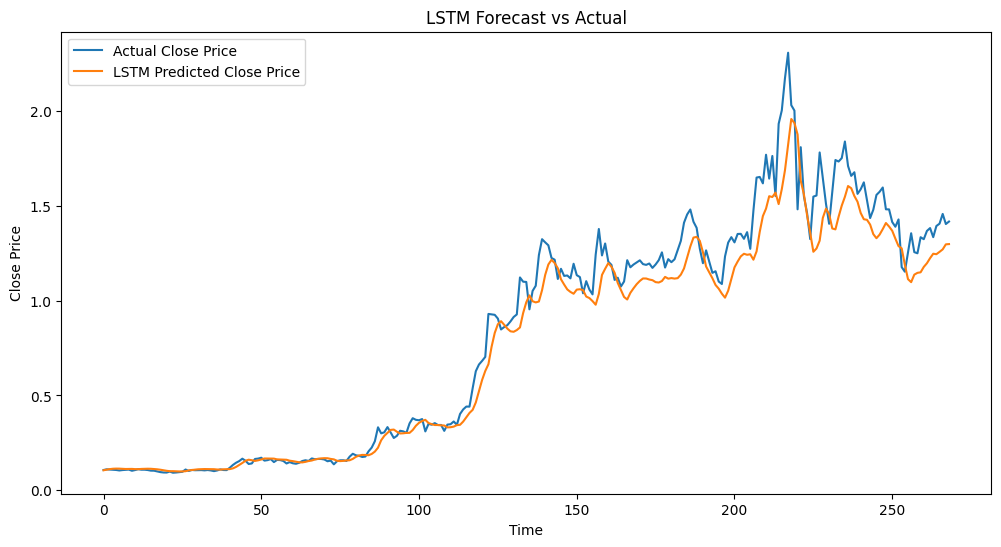

### **Results Description**

We begin with the plot. It illustrates the comparison between the actual close prices of Cardano (ADA) and the predicted close prices generated by the LSTM model.

The LSTM model closely tracks the overall trend and volatility of the actual prices, although some deviations are observed in regions of high fluctuation.

Then we examine the evaluation metrics for the LSTM model which are:

* Mean Absolute Error (MAE): 0.0827

  This indicates that, on average, the LSTM predictions deviate from the actual values by approximately 0.0827 USD.

* Mean Squared Error (MSE): 0.0167

  The average squared error is relatively low, reflecting that large deviations between the predicted and actual values are limited.

* Mean Absolute Percentage Error (MAPE): 8.62%

  On average, the LSTM predictions are off by 8.62% of the actual values, which is higher than ARIMA's MAPE of 2.22%.

### **Comparison to ARIMA**

* **Accuracy**: The ARIMA method outperformed LSTM, evidenced by its lower MAPE(2.22% to 8.62%). This suggests that the ARIMA provided more accurate forecasts for the Close price in our dataset.

* **Trend-following ability**: The LSTM plot is good in capturing overall trends and long-term dependencies, performing well in periods of stable growth or gradual changes. However, LSTM struggles slightly in regions of high volatility, where ARIMA can offer better short-term precision due to its statistical nature.

* **Model Complexity**: The ARIMA model is easier to implement and interpret, requiring fewer computational resources, while LSTM requires more data preprocessing, hyperparameter tuning, and computational power.

---

**Conclusion**

In our case the ARIMA model is superior due to its higher accuracy and simplicity. Although, LSTM shows promise in capturing trends and may perform better with additional data or hyperparameter tuning, with all things considered we prefer the ARIMA.